# DMPA LAB PROJECT

# Prediction of HypoThyroid

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.svm import SVC
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

## Importing uncleaned data from CSV file

In [2]:
missing_vals= ["?"]
df = pd.read_csv("hypothyroid.csv", na_values = missing_vals)
df= df.rename(columns={'Unnamed: 0': 'Label'})
df.head(10)

,Label,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,...,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,...,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,...,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,...,y,0.4,y,6.0,y,1.04,y,6.0,n,NaN
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,...,y,1.2,y,57.0,y,1.28,y,44.0,n,NaN
5,hypothyroid,85.0,F,f,f,f,f,t,f,f,...,y,1.1,y,27.0,y,1.19,y,23.0,n,NaN
6,hypothyroid,64.0,F,f,f,f,t,f,f,f,...,y,1.3,y,54.0,y,0.86,y,63.0,n,NaN
7,hypothyroid,72.0,F,f,f,f,f,f,f,f,...,y,1.9,y,34.0,y,1.05,y,32.0,n,NaN
8,hypothyroid,20.0,F,f,f,f,f,t,f,f,...,n,NaN,y,39.0,y,1.21,y,32.0,n,NaN
9,hypothyroid,42.0,F,f,f,f,f,f,f,f,...,n,NaN,y,7.6,y,1.02,y,7.5,n,NaN


## Data Preprocessing

### Removal of unnecessary columns and replacing missing values

In [3]:
s= df['Label']
s=s.map({'hypothyroid':1, 'negative':0})
df['Label']= s
s= df['Sex']
s=s.map({'M':1, 'F':0})
df['Sex']= s
df.head(10)

,Label,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,1,72.0,1.0,f,f,f,f,f,f,f,...,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN
1,1,15.0,0.0,t,f,f,f,f,f,f,...,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN
2,1,24.0,1.0,f,f,f,f,f,f,f,...,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN
3,1,24.0,0.0,f,f,f,f,f,f,f,...,y,0.4,y,6.0,y,1.04,y,6.0,n,NaN
4,1,77.0,1.0,f,f,f,f,f,f,f,...,y,1.2,y,57.0,y,1.28,y,44.0,n,NaN
5,1,85.0,0.0,f,f,f,f,t,f,f,...,y,1.1,y,27.0,y,1.19,y,23.0,n,NaN
6,1,64.0,0.0,f,f,f,t,f,f,f,...,y,1.3,y,54.0,y,0.86,y,63.0,n,NaN
7,1,72.0,0.0,f,f,f,f,f,f,f,...,y,1.9,y,34.0,y,1.05,y,32.0,n,NaN
8,1,20.0,0.0,f,f,f,f,t,f,f,...,n,NaN,y,39.0,y,1.21,y,32.0,n,NaN
9,1,42.0,0.0,f,f,f,f,f,f,f,...,n,NaN,y,7.6,y,1.02,y,7.5,n,NaN


In [4]:
thyroiddf= df[['Label','Age', 'Sex', 'TSH', 'T3', 'TT4', 'T4U']]
thyroiddf['Age'].fillna((thyroiddf['Age'].median()), inplace=True)
thyroiddf['TSH'].fillna(thyroiddf['TSH'].median(), inplace= True)
thyroiddf['T3'].fillna(thyroiddf['T3'].median(), inplace= True)
thyroiddf['TT4'].fillna(thyroiddf['TT4'].median(), inplace= True)
thyroiddf['T4U'].fillna(thyroiddf['T4U'].median(), inplace= True)
thyroiddf= thyroiddf.dropna()
thyroiddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3090 entries, 0 to 3162
Data columns (total 7 columns):
Label    3090 non-null int64
Age      3090 non-null float64
Sex      3090 non-null float64
TSH      3090 non-null float64
T3       3090 non-null float64
TT4      3090 non-null float64
T4U      3090 non-null float64
dtypes: float64(6), int64(1)
memory usage: 193.1 KB


C:\Users\megha\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [5]:
thyroiddf.head(10)

,Label,Age,Sex,TSH,T3,TT4,T4U
0,1,72.0,1.0,30.0,0.6,15.0,1.48
1,1,15.0,0.0,145.0,1.7,19.0,1.13
2,1,24.0,1.0,0.0,0.2,4.0,1.00
3,1,24.0,0.0,430.0,0.4,6.0,1.04
4,1,77.0,1.0,7.3,1.2,57.0,1.28
5,1,85.0,0.0,138.0,1.1,27.0,1.19
6,1,64.0,0.0,7.7,1.3,54.0,0.86
7,1,72.0,0.0,21.0,1.9,34.0,1.05
8,1,20.0,0.0,92.0,1.8,39.0,1.21
9,1,42.0,0.0,48.0,1.8,7.6,1.02


### Preparing data for training by extracting feature and label columns and splitting data in training and test sets

In [6]:
feature_cols = ['Age', 'Sex', 'TSH', 'T3','TT4','T4U']
X = thyroiddf[feature_cols]
y = thyroiddf['Label']
results={}
accuracy={}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Applying different Data Mining Techniques

## Decision Tree

In [7]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
results['decisionTree'] = y_pred

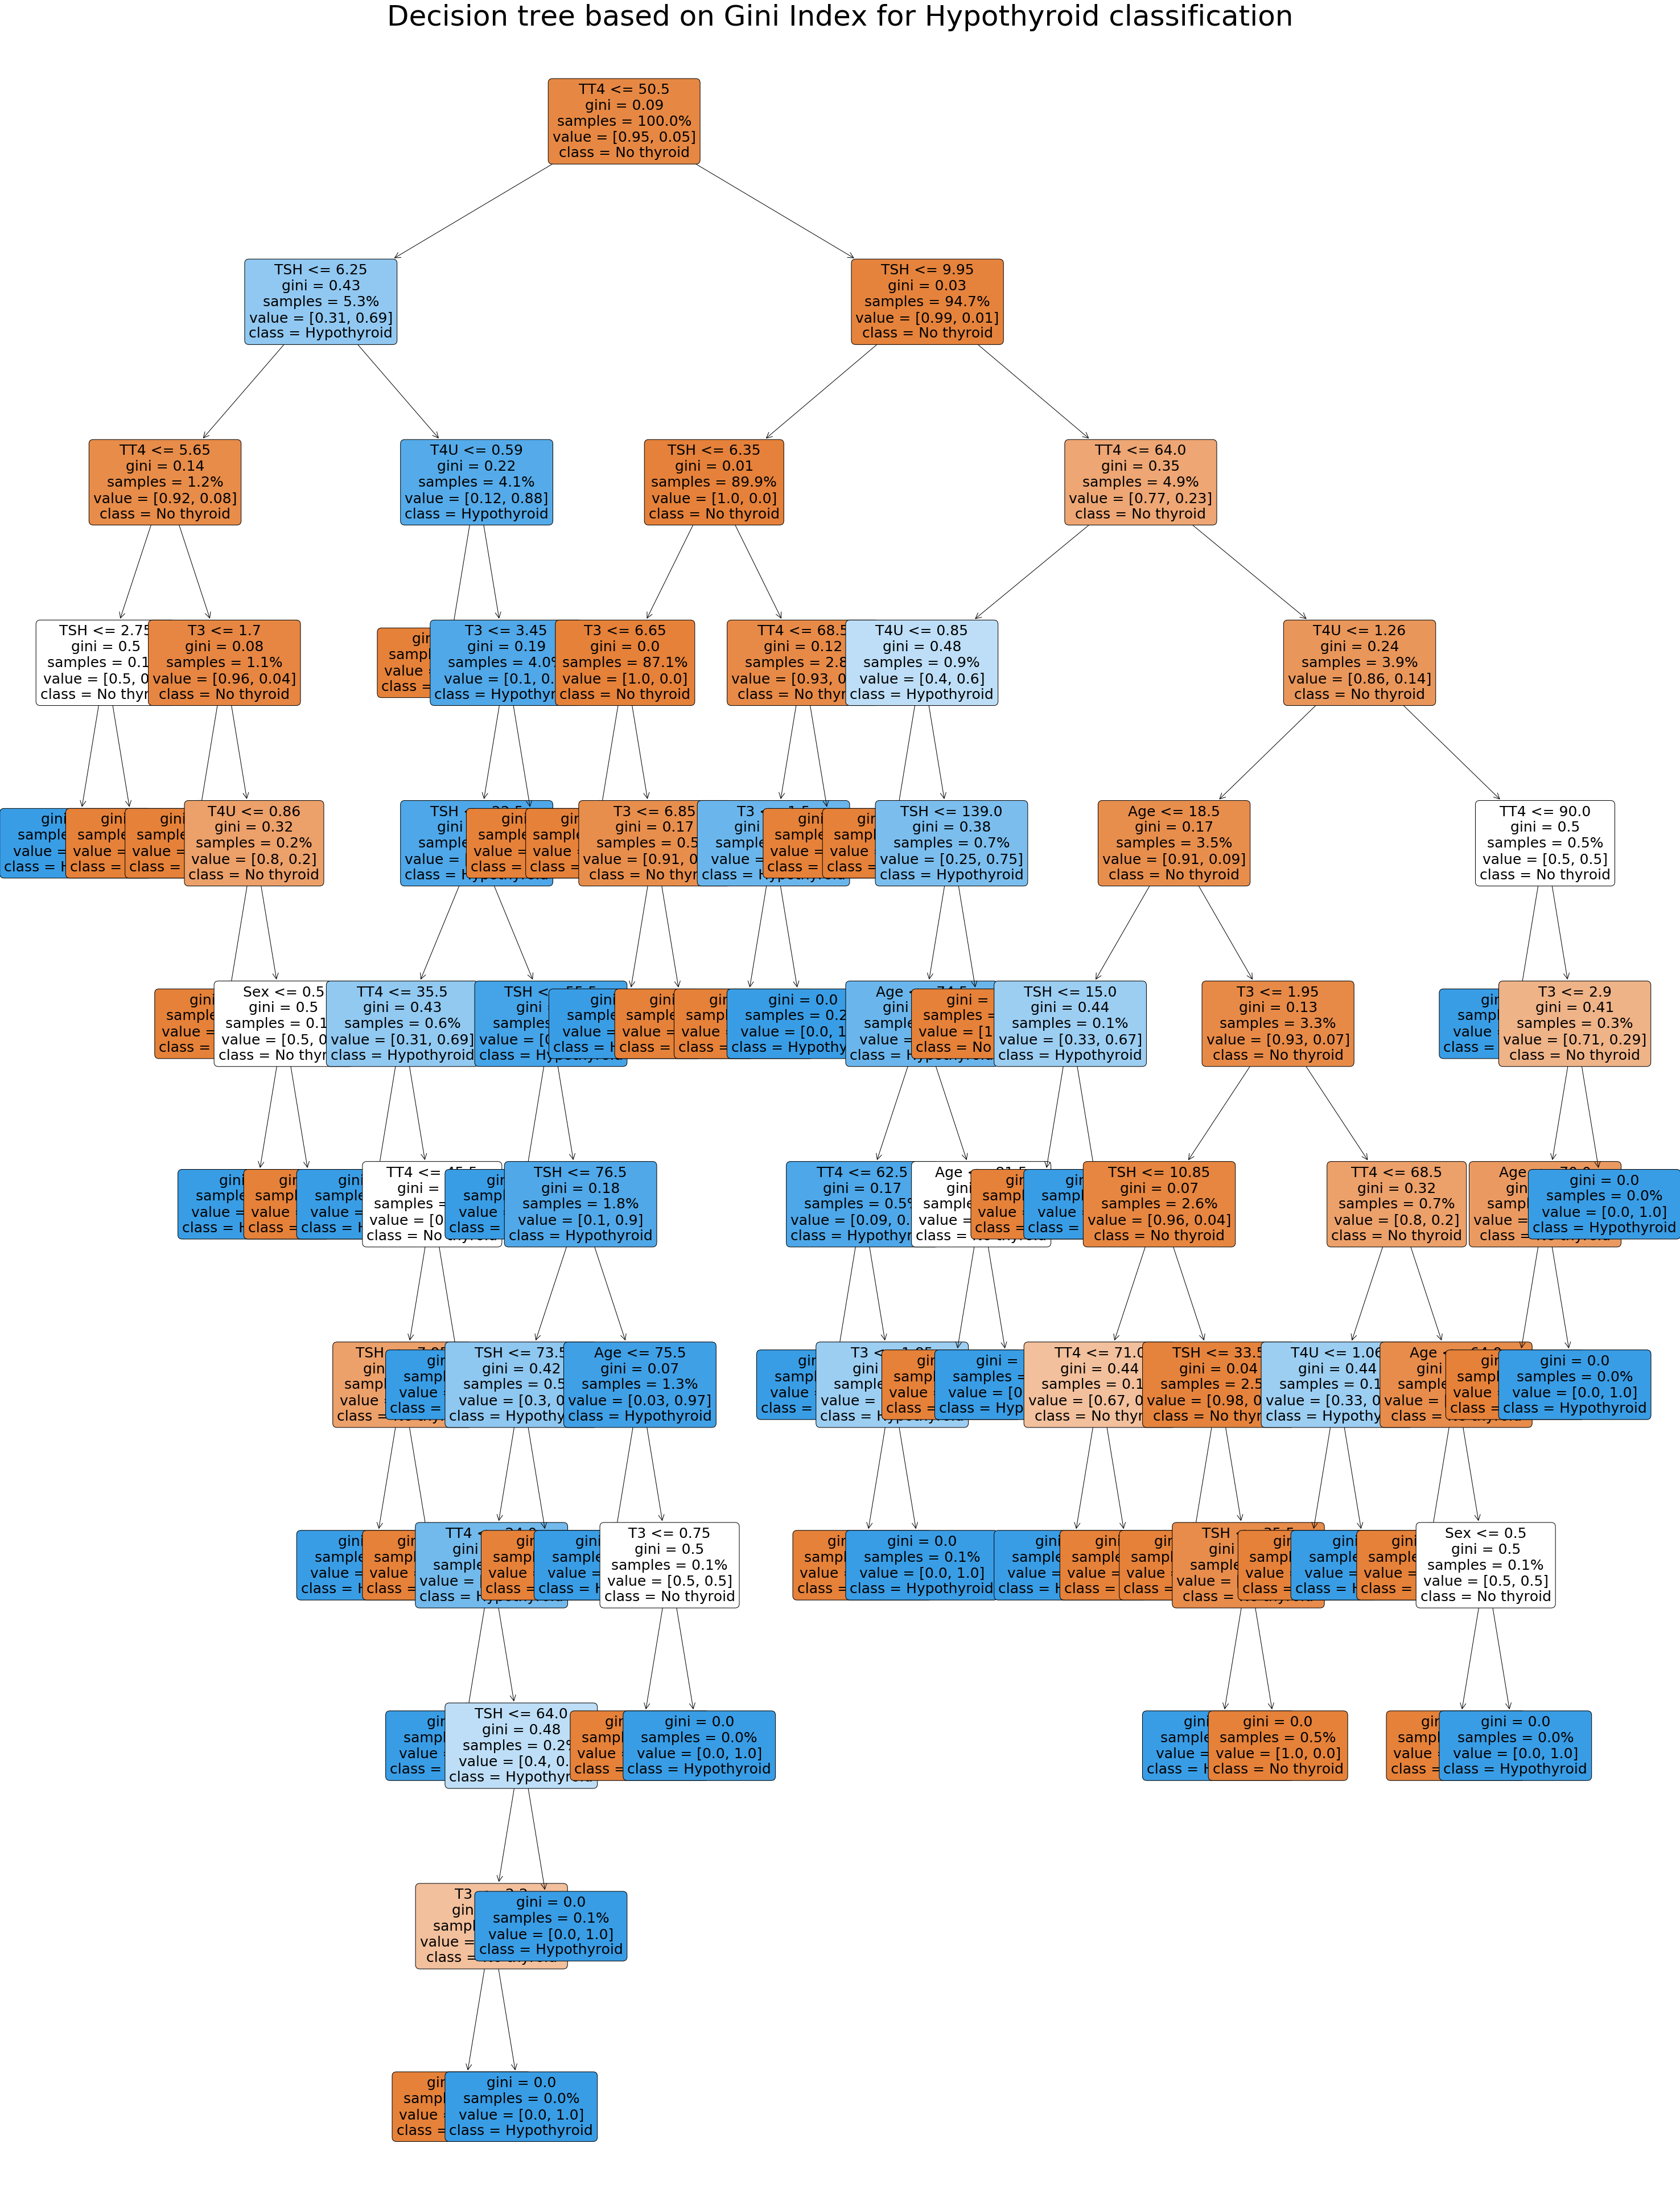

In [8]:
fig, ax = plt.subplots(figsize=(50, 70), edgecolor= 'black')
tree.plot_tree(clf, max_depth=15,precision= 2, fontsize=25, feature_names= feature_cols,class_names= ['No thyroid', 'Hypothyroid'],proportion= True,filled= True, rounded= True)
plt.title(label='Decision tree based on Gini Index for Hypothyroid classification', fontdict={'fontsize': 50})
plt.show()

### Performace, Accuracy and Results

In [9]:
accuracy['decisionTree'] = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print()
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print()
print("Classification Report:\n",classification_report(y_test, y_pred))

Accuracy: 0.982740021574973

Confusion Matrix:
 [[874  12]
 [  4  37]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       886
           1       0.76      0.90      0.82        41

    accuracy                           0.98       927
   macro avg       0.88      0.94      0.91       927
weighted avg       0.98      0.98      0.98       927



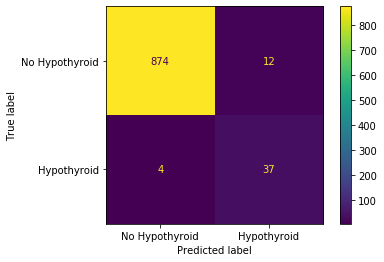

In [10]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=["No Hypothyroid", "Hypothyroid"])

In [12]:
thyroid=0
nothyroid=0
for i,j in enumerate(y_pred):
    if(j==0):
        nothyroid+=1
    else:
        thyroid+=1
decisionTree= [thyroid, nothyroid]        

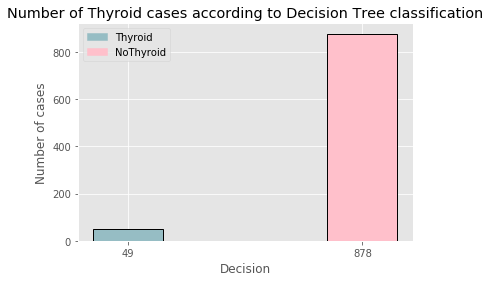

In [13]:
plt.style.use('ggplot')
x= ['Thyroid', 'No Thyroid']
colors = {'Thyroid':'#96BDC4', 'NoThyroid':'#FFC0CB'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.bar(x, decisionTree, color=['#96BDC4', '#FFC0CB'], edgecolor= 'black', linewidth= 1, width= 0.3, tick_label= decisionTree)
plt.xlabel("Decision")
plt.ylabel("Number of cases")
plt.title("Number of Thyroid cases according to Decision Tree classification")
plt.show()

## K-Nearest Neighbours

#### Figuring out the optimum number of clusters by trail and error

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
error = []
# Calculating error for K values between 1 and 10
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

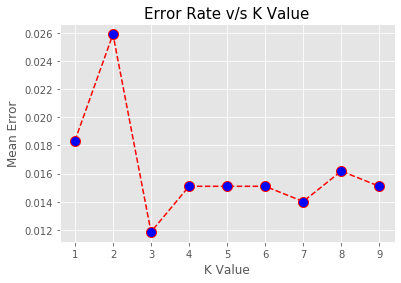

In [16]:
plt.figure()
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title(label= 'Error Rate v/s K Value', fontdict={'fontsize': 15})
plt.xlabel('K Value')
plt.ylabel('Mean Error')

#### As per above graph, least error is obtained for K=3

### Accuracy, Performance and Results for K=3

In [17]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
results['knn']= y_pred

In [18]:
accuracy['knn'] = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print()
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print()
print("Classification Report:\n",classification_report(y_test, y_pred))

Accuracy: 0.9881337648327939

Confusion Matrix:
 [[884   2]
 [  9  32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       886
           1       0.94      0.78      0.85        41

    accuracy                           0.99       927
   macro avg       0.97      0.89      0.92       927
weighted avg       0.99      0.99      0.99       927



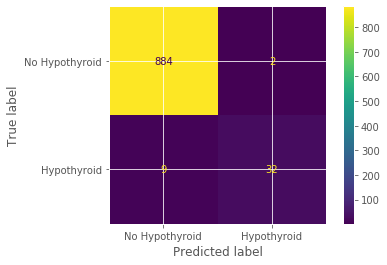

In [19]:
plot_confusion_matrix(knn, X_test, y_test, display_labels=["No Hypothyroid", "Hypothyroid"])

In [20]:
thyroid=0
nothyroid=0
for i,j in enumerate(y_pred):
    if(j==0):
        nothyroid+=1
    else:
        thyroid+=1
knnClassifier= [thyroid, nothyroid]

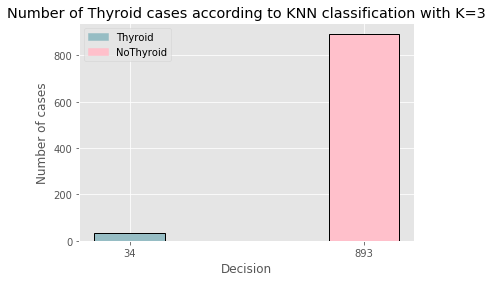

In [21]:
plt.style.use('ggplot')
x= ['Thyroid', 'No Thyroid']
colors = {'Thyroid':'#96BDC4', 'NoThyroid':'#FFC0CB'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.bar(x, knnClassifier, color=['#96BDC4', '#FFC0CB'], edgecolor= 'black', linewidth= 1, width= 0.3,tick_label =knnClassifier)
plt.xlabel("Decision")
plt.ylabel("Number of cases")
plt.title("Number of Thyroid cases according to KNN classification with K=3")
plt.show()

## Support Vector Machine

In [22]:
allAccuracies={}
allResults={}

### 1.Linear Kernel Accuracy, Performance and Results

In [23]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
allResults['svmLinear']= y_pred

In [24]:
allAccuracies['svmLinear']= metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print()
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print()
print("Classification Report:\n",classification_report(y_test, y_pred))

Accuracy: 0.9848975188781014

Confusion Matrix:
 [[884   2]
 [ 12  29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       886
           1       0.94      0.71      0.81        41

    accuracy                           0.98       927
   macro avg       0.96      0.85      0.90       927
weighted avg       0.98      0.98      0.98       927



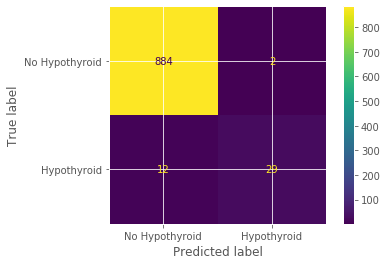

In [26]:
plot_confusion_matrix(svclassifier, X_test, y_test, display_labels=["No Hypothyroid", "Hypothyroid"])

In [27]:
thyroid=0
nothyroid=0
for i,j in enumerate(y_pred):
    if(j==0):
        nothyroid+=1
    else:
        thyroid+=1
svmLinear= [thyroid, nothyroid]  

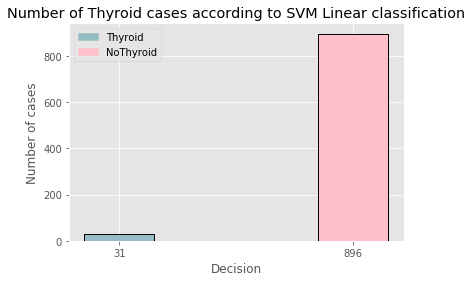

In [28]:
plt.style.use('ggplot')
x= ['Thyroid', 'No Thyroid']
colors = {'Thyroid':'#96BDC4', 'NoThyroid':'#FFC0CB'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.bar(x, svmLinear, color=['#96BDC4', '#FFC0CB'], edgecolor= 'black', linewidth= 1, width= 0.3, tick_label = svmLinear)
plt.xlabel("Decision")
plt.ylabel("Number of cases")
plt.title("Number of Thyroid cases according to SVM Linear classification")
plt.show()

### 2.Radial Basis Function Kernel Accuracy, Performance and Results

In [36]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
allResults['svmRbf'] = y_pred

In [37]:
allAccuracies['svmRbf'] = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print()
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print()
print("Classification Report:\n",classification_report(y_test, y_pred))

Accuracy: 0.9870550161812298

Confusion Matrix:
 [[884   2]
 [ 10  31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       886
           1       0.94      0.76      0.84        41

    accuracy                           0.99       927
   macro avg       0.96      0.88      0.92       927
weighted avg       0.99      0.99      0.99       927



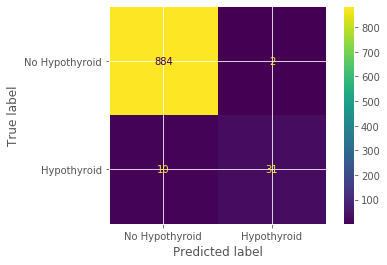

In [38]:
plot_confusion_matrix(svclassifier, X_test, y_test, display_labels=["No Hypothyroid", "Hypothyroid"])

In [39]:
thyroid=0
nothyroid=0
for i,j in enumerate(y_pred):
    if(j==0):
        nothyroid+=1
    else:
        thyroid+=1
svmRbf= [thyroid, nothyroid]  

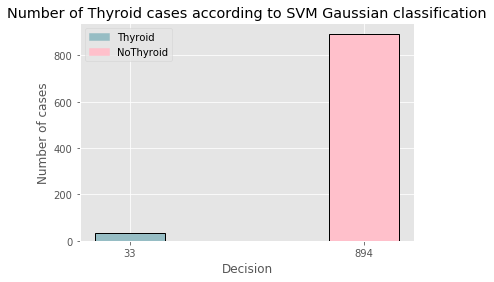

In [40]:
plt.style.use('ggplot')
x= ['Thyroid', 'No Thyroid']
colors = {'Thyroid':'#96BDC4', 'NoThyroid':'#FFC0CB'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.bar(x, svmRbf, color=['#96BDC4', '#FFC0CB'], edgecolor= 'black', linewidth= 1, width= 0.3, tick_label = svmRbf)
plt.xlabel("Decision")
plt.ylabel("Number of cases")
plt.title("Number of Thyroid cases according to SVM Gaussian classification")
plt.show()

### 3.Sigmoid Kernel Performance, Accuracy and Results

In [41]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
allResults['svmSigmoid'] = y_pred

In [42]:
allAccuracies['svmSigmoid'] = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print()
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print()
print("Classification Report:\n",classification_report(y_test, y_pred))

Accuracy: 0.9622437971952535

Confusion Matrix:
 [[872  14]
 [ 21  20]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       886
           1       0.59      0.49      0.53        41

    accuracy                           0.96       927
   macro avg       0.78      0.74      0.76       927
weighted avg       0.96      0.96      0.96       927



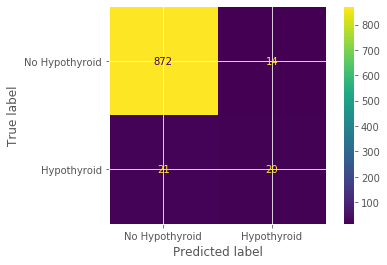

In [44]:
plot_confusion_matrix(svclassifier, X_test, y_test, display_labels=["No Hypothyroid", "Hypothyroid"])

In [45]:
thyroid=0
nothyroid=0
for i,j in enumerate(y_pred):
    if(j==0):
        nothyroid+=1
    else:
        thyroid+=1
svmSigmoid= [thyroid, nothyroid]

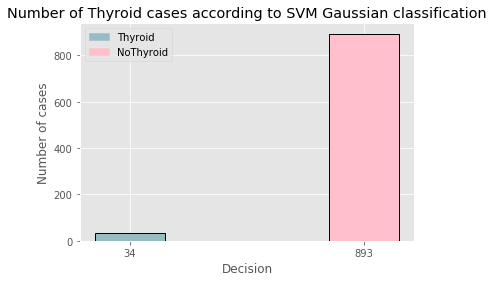

In [46]:
plt.style.use('ggplot')
x= ['Thyroid', 'No Thyroid']
colors = {'Thyroid':'#96BDC4', 'NoThyroid':'#FFC0CB'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.bar(x, svmSigmoid, color=['#96BDC4', '#FFC0CB'], edgecolor= 'black', linewidth= 1, width= 0.3, tick_label = svmSigmoid)
plt.xlabel("Decision")
plt.ylabel("Number of cases")
plt.title("Number of Thyroid cases according to SVM Gaussian classification")
plt.show()

### 4.Polynomial Kernel

#### Figuring out optimal polynomial degree by trial and error

In [47]:
error = []
# Calculating error for K values between 1 and 10
for i in range(1, 10):
    svclassifier = SVC(kernel='poly', degree=i)
    svclassifier.fit(X_train, y_train)
    pred_i = svclassifier.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

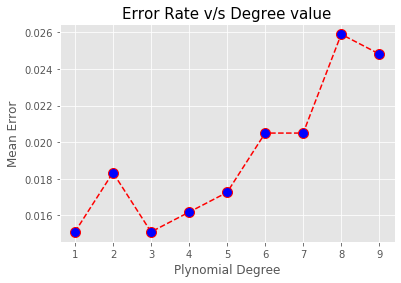

In [48]:
plt.figure()
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title(label= 'Error Rate v/s Degree value', fontdict={'fontsize': 15})
plt.xlabel('Plynomial Degree')
plt.ylabel('Mean Error')

#### As per above graph, least error is obtained when degree= 3

In [49]:
svclassifier = SVC(kernel='poly', degree=3)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
allResults['svmPoly'] = y_pred

In [50]:
allAccuracies['svmPoly'] = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print()
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print()
print("Classification Report:\n",classification_report(y_test, y_pred))

Accuracy: 0.9848975188781014

Confusion Matrix:
 [[882   4]
 [ 10  31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       886
           1       0.89      0.76      0.82        41

    accuracy                           0.98       927
   macro avg       0.94      0.88      0.90       927
weighted avg       0.98      0.98      0.98       927



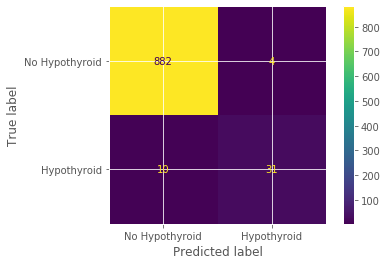

In [52]:
plot_confusion_matrix(svclassifier, X_test, y_test, display_labels=["No Hypothyroid", "Hypothyroid"])

In [53]:
thyroid=0
nothyroid=0
for i,j in enumerate(y_pred):
    if(j==0):
        nothyroid+=1
    else:
        thyroid+=1
svmPoly= [thyroid, nothyroid]

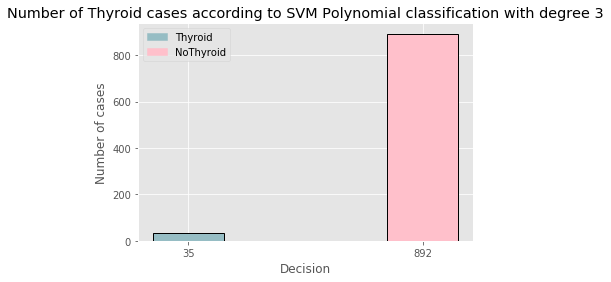

In [54]:
plt.style.use('ggplot')
x= ['Thyroid', 'No Thyroid']
colors = {'Thyroid':'#96BDC4', 'NoThyroid':'#FFC0CB'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.bar(x, svmPoly, color=['#96BDC4', '#FFC0CB'], edgecolor= 'black', linewidth= 1, width= 0.3, tick_label = svmPoly)
plt.xlabel("Decision")
plt.ylabel("Number of cases")
plt.title("Number of Thyroid cases according to SVM Polynomial classification with degree 3")
plt.show()

In [55]:
for i,j in (allAccuracies.items()):
    if (j== max(allAccuracies.values())):
        results[i] = allResults[i]
        accuracy[i] = j
        break

## Naive Bayes

### Performance, Accuracy and Results

In [56]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
results['naiveBayes'] = y_pred

In [57]:
accuracy['naiveBayes'] = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print()
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print()
print("Classification Report:\n",classification_report(y_test, y_pred))

Accuracy: 0.9848975188781014

Confusion Matrix:
 [[883   3]
 [ 11  30]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       886
           1       0.91      0.73      0.81        41

    accuracy                           0.98       927
   macro avg       0.95      0.86      0.90       927
weighted avg       0.98      0.98      0.98       927



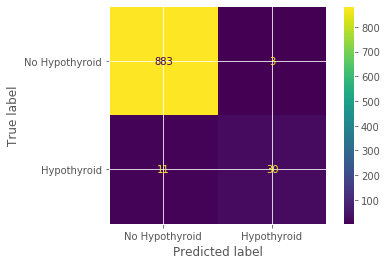

In [58]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=["No Hypothyroid", "Hypothyroid"])

In [59]:
thyroid=0
nothyroid=0
for i,j in enumerate(y_pred):
    if(j==0):
        nothyroid+=1
    else:
        thyroid+=1
gnbClassifier= [thyroid, nothyroid]

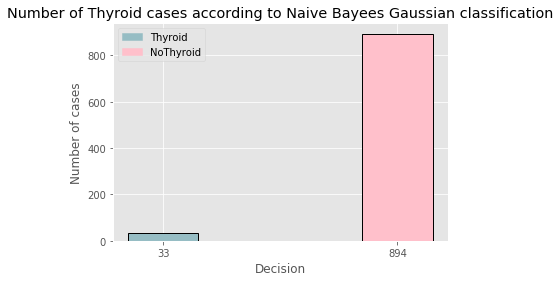

In [60]:
plt.style.use('ggplot')
x= ['Thyroid', 'No Thyroid']
colors = {'Thyroid':'#96BDC4', 'NoThyroid':'#FFC0CB'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.bar(x, gnbClassifier, color=['#96BDC4', '#FFC0CB'], edgecolor= 'black', linewidth= 1, width= 0.3, tick_label = gnbClassifier, label=x)
plt.xlabel("Decision")
plt.ylabel("Number of cases")
plt.title("Number of Thyroid cases according to Naive Bayees Gaussian classification")
plt.show()

## Comparison of Performance

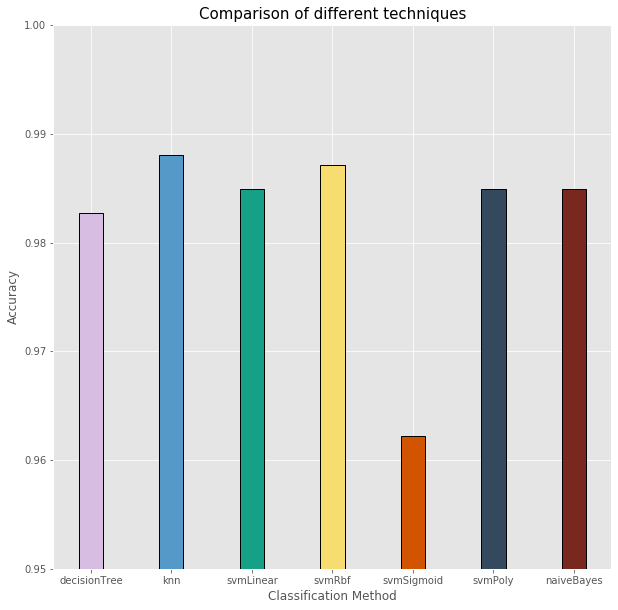

In [61]:
plt.style.use('ggplot')
plt.figure(figsize=(10,10))
x= []
y=[]
for i,j in accuracy.items():
    if i!='svmRbf':
        x.append(i)
        y.append(round(j,4)) 
    else:
        for k,l in allAccuracies.items():
            x.append(k)
            y.append(round(l,4))
plt.bar(x, y, color=['#D7BDE2', '#5499C7', '#16A085', '#F7DC6F', '#D35400', '#34495E', '#78281F'], edgecolor= 'black', linewidth= 1, width= 0.3, label=x)
plt.xlabel("Classification Method")
plt.ylabel("Accuracy")
plt.ylim(0.950,1)
plt.title("Comparison of different techniques", fontdict={'fontsize': 15})
plt.show()

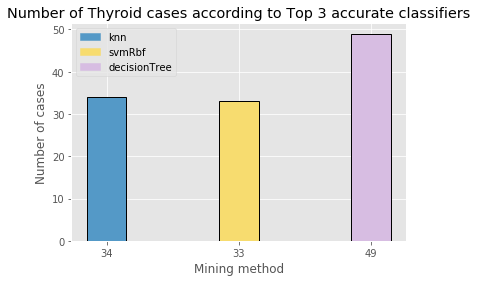

In [62]:
plt.style.use('ggplot')
x= ['knn', 'svmRbf', 'decisionTree']
y= [knnClassifier[0], svmRbf[0], decisionTree[0]]
colors = {'knn':'#5499C7', 'svmRbf':'#F7DC6F', 'decisionTree': '#D7BDE2'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.bar(x, y, color=['#5499C7','#F7DC6F', '#D7BDE2'], edgecolor= 'black', linewidth= 1, width= 0.3, tick_label = y, label=x)
plt.xlabel("Mining method")
plt.ylabel("Number of cases")
plt.title("Number of Thyroid cases according to Top 3 accurate classifiers")
plt.show()